## Notebook 10: Variáveis aleatórias contínuas
Neste Notebook, vamos abordar a distribuição contínua. Começamos por analisar dados que geramos nós mesmos e vamos considerar os dados reais no final do Notebook.

A distribuição de probabilidade mais comum é, provavelmente (passe a redundância), a distribuição Normal. Os números aleatórios de uma distribuição Normal podem ser gerados com a função `normal` no subpacote `random` do pacote `numpy`, em que a palavra-chave `loc` é a média (a predefinição é 0) e `scale` é o desvio padrão (a predefinição é 1). A média e o desvio padrão de um conjunto de dados podem ser calculados com as funções `mean` e `std` do pacote `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
%matplotlib inline

In [2]:
data = rnd.normal(loc=5, scale=2, size=100)  # Array com 100 valores
print('média dos dados: ', np.mean(data))
print('desvio padrão dos dados: ', np.std(data))

média dos dados:  5.05327626633
desvio padrão dos dados:  2.12590328172


Note que a média e o desvio padrão dos 100 números obtidos de uma distribuição normal com média de 5 e um desvio padrão de 2 não são exatamente iguais a 5 e 2, respetivamente. Afinal de contas, estas são apenas estimativas do desvio padrão e da média verdadeiros subjacentes. Estas estimativas designam-se média amostral e desvio padrão da amostra (dos 100 números obtidos de uma distribuição Normal). Execute o código acima várias vezes. É obtido um novo conjunto de 100 números aleatórios de cada vez, com um desvio padrão e uma média ligeiramente diferentes. Voltaremos a esta questão mais tarde.

### Histogramas
Provavelmente, a primeira coisa a fazer quando obtém um novo conjunto de dados é ver os dados. Uma forma de o fazer é através de um histograma. Para criar um histograma, conta quantos pontos de dados recaem num determinado intervalo. Por exemplo, quantos pontos de dados existem entre 5 e 6. Estes intervalos designam-se *bins*. O gráfico de barras do número de pontos de dados em cada *bin* designa-se um histograma. A função utilizada para calcular e representar graficamente um histograma designa-se `hist` e faz parte do pacote `matplotlib`. A forma mais simples de representar graficamente um histograma é deixar a função `hist` decidir os *bins* que vai usar; o número de *bins* predefinido é `nbin=10`; a função `hist` define até onde colocar os limites dos *bins*. A função `hist` cria um histograma e devolve um tuplo com três elementos. O primeiro elemento é um array com o tamanho `nbin`, que contém o número de pontos de dados em cada *bin*. O segundo elemento é um array com o tamanho `nbin+1`, que contém os limites dos *bins*. O terceiro elemento é uma lista de objetos que representam as barras do histograma; não vamos utilizar este último elemento aqui.

Na célula de código abaixo, criamos um histograma de 100 pontos obtidos de uma distribuição Normal, com uma média de 6 e um desvio padrão de 2. Note que, com um conjunto de dados de 100 pontos, o histograma não se parece muito à típica curva em forma de sino, caraterística de uma distribuição Normal, embora os pontos de dados sejam de facto obtidos de uma distribuição Normal real. Execute o código abaixo várias vezes para ver como muda com um novo conjunto aleatório de 100 pontos de dados.

número de pontos de dados em cada bin: [  3.   4.   7.  22.  19.  22.  10.  10.   2.   1.]
limites dos bins: [  1.26234945   2.31121987   3.3600903    4.40896072   5.45783114
   6.50670156   7.55557199   8.60444241   9.65331283  10.70218326
  11.75105368]


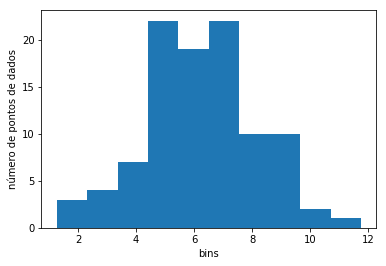

In [3]:
data = rnd.normal(loc=6, scale=2, size=100)
hist_data = plt.hist(data)
plt.xlabel('bins')
plt.ylabel('número de pontos de dados')
print('número de pontos de dados em cada bin:', hist_data[0])
print('limites dos bins:', hist_data[1])

Como pode ver no exemplo anterior, os limites dos bins não são escolhidos como números simpáticos: a função `hist` toma os valores máximo e mínimo dos dados e divide-os em intervalos iguais de `nbin`. Por norma, quererá especificar o número de bins com a palavra-chave `bins` e o intervalo (limites mínimo e máximo dos bins) com a palavra-chave `range`. Se os valores de dados estiverem fora do intervalo (como outliers), são ignorados. No código abaixo, são escolhidos 12 bins espaçados de forma igual de 0 a 12. Note que usamos os mesmos dados do gráfico acima, mas ao simplesmente escolhermos bins diferentes, o histograma tem um aspeto bastante diferente.

número de pontos de dados em cada bin: [  0.   2.   1.   9.  14.  20.  22.  14.  11.   6.   0.   1.]
limites dos bins: [  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.]


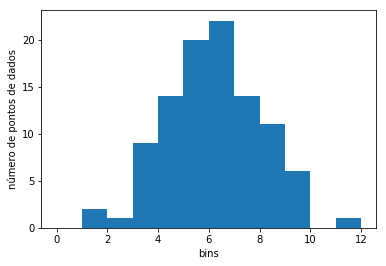

In [4]:
hist_data = plt.hist(data, bins=12, range=(0, 12))
print('número de pontos de dados em cada bin:', hist_data[0])
print('limites dos bins:', hist_data[1])
plt.xlabel('bins')
plt.ylabel('número de pontos de dados');

Pode ser adicionada uma linha que represente a função de densidade da probabilidade da distribuição normal subjacente. Comece por importar a classe `norm` do pacote `scipy.stats`. Depois, execute a função `norm.pdf` (pdf representa função de densidade da probabilidade, do inglês *probability density function*) para calcular os valores da distribuição normal dados os três argumentos: os valores de $x$ onde calcular a distribuição normal, a média e o desvio padrão. Vamos adicionar a distribuição Normal subjacente ao histograma que acabámos de criar. A única coisa que temos de mudar no histograma é o eixo vertical. No gráfico acima, o eixo vertical apresenta o número de pontos de dados. Precisamos de normalizar isto para que o eixo vertical dê a probabilidade de um ponto de dados se encontrar num bin. O histograma pode ser normalizado através da palavra-chave `normed=True`.

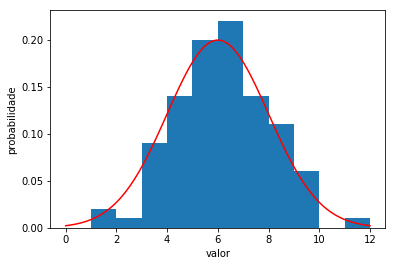

In [5]:
from scipy.stats import norm
a = plt.hist(data, bins=12, range=(0, 12), normed=True)
x = np.linspace(0, 12, 100)
y = norm.pdf(x, 6, 2) # mu=6, sig=2
plt.plot(x, y, 'r')
plt.xlabel('valor')
plt.ylabel('probabilidade');

### <a name="back1"></a>Exercício 1. O primeiro histograma
Gere 1000 números aleatórios a partir de uma distribuição Normal com uma média de 100 e um desvio padrão de 10. Calcule e apresente no ecrã a média e o desvio padrão dos seus dados. Crie dois gráficos um acima do outro através do comando `plt.subplot` (use `plt.subplot?` se se esqueceu de como o fazer). No gráfico de cima, represente um histograma com 20 bins de 50 a 150. Note que, com um conjunto de dados deste tamanho (1000 pontos de dados), o histograma começa a parecer-se muito mais com a típica curva em forma de sino de uma distribuição Normal. Adicione ao gráfico uma linha vermelha que represente a função de densidade da probabilidade da distribuição normal subjacente. No gráfico de baixo, crie um histograma da função de distribuição acumulada ao definir a palavra-chave `cumulative=True` (consulte `plt.hist?` para obter detalhes). No último gráfico, também pode ser positivo usar as palavras-chave `histtype='step'` e `align='right'`. Adicione ao gráfico uma linha vermelha que represente a função de distribuição acumulada da distribuição normal subjacente através da função `norm.cdf`, que funciona tal como a função `norm.pdf`, mas calcula a função de distribuição acumulada (cdf, do inglês *cumulative distribution function*). Por último, certifique-se de que os limites ao longo do eixo horizontal são os mesmos para ambos os gráficos.

<a href="#ex1answer">Soluções do Exercício 1</a>

### Percentis
Outra descrição útil de um conjunto de dados são os percentis ou quantis. Para tal, consideramos os dados ordenados, ou seja, ordenamos os pontos de dados no sentido ascendente (para que o primeiro ponto de dados seja o valor mínimo dos dados e o último ponto de dados seja o valor máximo). O percentil 25 é o ponto de dados nos dados ordenados que garante que 25% dos dados estão abaixo deste ponto de dados (logo, 75% estão acima deste ponto de dados). Os percentis de um conjunto de dados são habitualmente referidos como “percentis empíricos”, pois são os percentis do conjunto de dados e não da distribuição subjacente. O percentil empírico 50 é equivalente à mediana dos dados. Os intervalos comuns a observar são a região dos 50% em torno da mediana (também designado intervalo interquartil ou IQR), que vai do percentil empírico 25 ao percentil empírico 75, e a região dos 95%, que vai do percentil empírico 2,5 ao percentil empírico 97,5. Os percentis de um conjunto de dados podem ser calculados com a função `percentile` do pacote `numpy`. O primeiro argumento são os dados, o segundo argumento é uma lista de percentis:

In [6]:
data = rnd.normal(loc=10, scale=2, size=100)
lower, median, upper = np.percentile(data, [2.5, 50, 97.5])
print('percentil 2.5:', lower)
print('percentil 50:', median)
print('percentil 97.5:', upper)
print('intervalo 95%:', lower, ' até ', upper)

percentil 2.5: 6.21945242096
percentil 50: 10.2104190482
percentil 97.5: 13.7214065335
intervalo 95%: 6.21945242096  até  13.7214065335


Os percentis teóricos de uma dada distribuição podem ser calculados com a função `ppf`, exceto no caso de os percentis serem dados como valores inferiores a 1 (ou seja, 0,5 para o percentil 50). Por exemplo, os valores teóricos para a distribuição Normal usada acima são:

In [7]:
norm.ppf([0.025, 0.5, 0.975], loc=10, scale=2)

array([  6.08007203,  10.        ,  13.91992797])

### <a name="back2"></a>Exercício 2. Quartil superior e inferior
Gere 100 pontos de dados a partir de uma distribuição Normal com uma média de 20 e um desvio padrão de 4. Calcule o intervalo interquartil (intervalo de 25% a 75%). Calcule o valor teórico do intervalo interquartil e compare-o com o intervalo interquartil dos dados. Crie um histograma da distribuição acumulada. Adicione linhas verticais vermelhas ao gráfico para os percentis empíricos 25 e 75 dos dados e linhas verticais pretas para os percentis 25 e 75 da distribuição subjacente. As linhas verticais ao longo do gráfico podem ser adicionadas com a função `plt.axvline`, que assume o valor de $x$ da linha como um argumento. Para especificar a cor da linha vertical, use o argumento de palavra-chave `color`.

<a href="#ex2answer">Soluções do Exercício 2</a>

### Diagramas de caixa de bigodes (*Box-whisker plots*)
Os diagramas de caixa de bigodes (também referidos como boxplots) são uma forma de visualizar o nível e o alcance dos dados. A partir de uma boxplot, pode ver se os dados são simétricos ou não e quão amplos são os dados. Um diagrama de caixa de bigodes pode ser criado com a função `boxplot` do pacote `matplotlib` da seguinte forma:

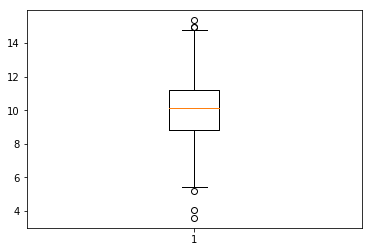

In [8]:
rnd.seed(10)
data = rnd.normal(loc=10, scale=2, size=500)
plt.boxplot(data);

A função `boxplot` cria o gráfico e devolve muitas coisas, como 'caixas', 'linhas horizontais no final dos bigodes (em inglês, *caps*)', etc. Estas últimas são úteis para as diferentes caraterísticas do gráfico e não as vamos usar aqui. O que vê no gráfico é uma linha vermelha na mediana dos dados. A caixa azul abrange o intervalo IQR do quartil inferior (25%) ao quartil superior (75%). As caixas são as linhas pretas que estão unidas à caixa de 50% com linhas pretas. Prolongam-se pelo ponto de dados mais extremo no intervalo de dados `whis*IQR`, em que o valor predefinido de `whis` é 1,5. Quaisquer pontos de dados que recaiam fora das caixas são potenciais outliers e são representados graficamente como pequenos círculos. Neste caso, há 5 pontos fora das caixas, mas nenhum é outlier. Foram, afinal de contas, obtidos da distribuição Normal!

### Pandas
Todas as técnicas descritas neste Notebook também podem ser realizadas com o pacote `pandas`. Geralmente, o `pandas` é mais simples, pois tem muito mais funcionalidades. Pode gerir os valores em falta (valores `NaN`, por exemplo) e, por predefinição, as representações gráficas têm um bom aspeto.

A função `read_csv` do pacote `pandas` poderá ser usada para ler dados de um ficheiro e armazená-los num `DataFrame` (consulte o Notebook onde abordámos o pacote `pandas`). Um `DataFrame` também pode ser criado do zero. Primeiro, o pacote `pandas` é importado e designado `pd`. Depois, é criado um `DataFrame` e os valores são adicionados a duas colunas ao obter duas distribuições normais diferentes; as colunas são designadas `test1` e `test2`. A função `describe` do pacote `pandas` cria um belo resumo dos dados, incluindo o número de valores, a média, o desvio padrão e os valores mínimo, de 25%, de 50%, de 75% e máximo.

In [9]:
import pandas as pd
data = pd.DataFrame()
data['test1'] = rnd.normal(loc=3, scale=2, size=100)
data['test2'] = rnd.normal(loc=5, scale=1, size=100)
data.describe()

,test1,test2
count,100.000000,100.000000
mean,2.862210,5.101536
std,1.883256,0.933086
min,-2.632002,3.012896
25%,1.487364,4.512289
50%,2.742579,5.003217
75%,4.158108,5.631319
max,8.343370,7.662577


Valores como `mean` ou `max` podem ser obtidos para todo o `DataFrame` ou para uma coluna de cada vez. Os percentis podem ser obtidos através da função `quantile`. A função `quantile` devolve um `DataFrame`, ao qual se pode aceder com funções padrão para `DataFrame`, ou os valores podem ser extraídos para um array `numpy` por meio do atributo `.values`.

In [10]:
print('mínimo de test1:', data.test1.min())
print('desvio padrão de DataFrame:')
print(data.std())
print('percentis de 5% and 95% de test2:')
print(data.test2.quantile([0.05, 0.95]))
print('quantile como numpy array:', data.test2.quantile([0.05, 0.95]).values)

mínimo de test1: -2.6320024343
desvio padrão de DataFrame:
test1    1.883256
test2    0.933086
dtype: float64
percentis de 5% and 95% de test2:
0.05    3.535725
0.95    6.821249
Name: test2, dtype: float64
quantile como numpy array: [ 3.53572544  6.82124898]


O histograma dos dados em duas colunas pode ser criado com a função `hist` do pacote `pandas`. Note que a palavra-chave `sharex` está definida como `True` para que o eixo horizontal tenha o mesmo tamanho em ambos os histogramas (o que facilita a comparação). O tamanho da figura é especificado para que a figura seja mais ampla (10) do que alta (4).

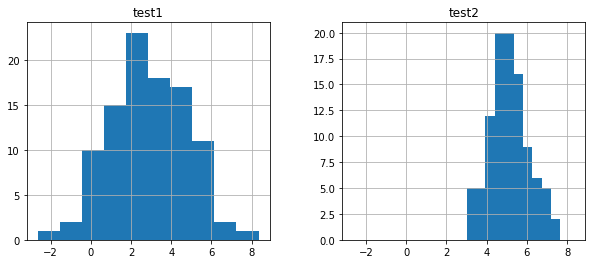

In [11]:
data.hist(sharex=True, figsize=(10, 4));

### Dados em falta
Os dados reais geralmente contêm valores em falta. Todas as bases de dados têm a sua forma de tratar valores em falta. Algumas bases de dados deixam o valor vazio, outras substituem um número que pode ser facilmente reconhecido (por exemplo, -9999). No `pandas`, estes valores podem ser convertidos em *Not A Number* através do valor `NaN` do pacote `numpy` (funciona tanto no formato `np.NaN` como `np.nan`). No código abaixo, o valor com índice 5 na coluna `test1` mudou para `nan`. Pode ser obtido um histograma acumulado como:
(Nota: a função `plt.hist` não funciona com dados que incluam valores não numéricos, mas a função do histograma do `pandas` funciona bem.)

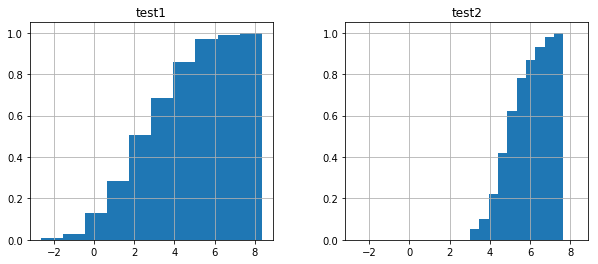

In [12]:
data.test1[5] = np.nan  # Substituir o valor de test1 com índice 5 por nan
data.hist(cumulative=True, sharex=True, figsize=(10, 4), normed=True);

O `pandas` também representa boxplots de um DataFrame.

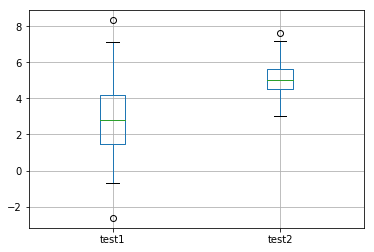

In [13]:
data.boxplot();

O histograma ou boxplot de uma coluna de um DataFrame pode ser obtido ao especificar a coluna que pretende representar graficamente:

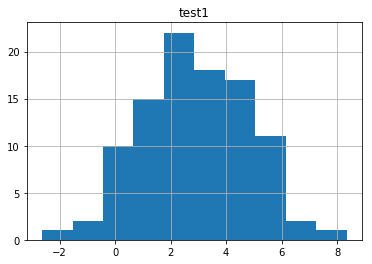

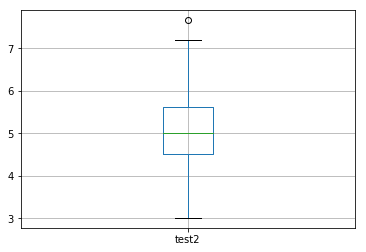

In [14]:
plt.figure()
data.hist(column='test1')  # Cria o histograma da coluna test1
plt.figure()
data.boxplot(column='test2');  # Cria o boxplot da coluna test2

### Valores únicos num DataFrame
O pacote `pandas` pode ser muito útil para determinar os valores únicos num DataFrame ou na coluna de um DataFrame. Como exemplo, vamos criar um DataFrame com 100 números inteiros aleatórios entre 1 e 10. Pode encontrar os valores únicos na coluna com a função `.unique()`.

In [15]:
a = pd.DataFrame()
a['data'] = rnd.randint(1, 10 + 1, 100)
print('valores únicos na coluna:', a['data'].unique())

valores únicos na coluna: [ 6  7 10  2  8  1  3  9  4  5]


Vamos agora começar a aplicar as nossas técnicas estatísticas em dados reais em vez de em conjuntos de dados gerados com um gerador de números aleatórios.

<figure>
<img src= "http://upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Pseudotsuga_menziesii_28236.JPG/450px-Pseudotsuga_menziesii_28236.JPG" width="200" ALIGN="right" style="padding:10px;"> 
</figure>
### Conjunto de dados de experiências em vigas de madeira
É fornecido um conjunto de dados de 356 experiências em vigas de madeira, abetos de Douglas para ser mais específico (consulte a imagem à direita), no ficheiro `douglas_data.csv` (dados cedidos por Geert Ravenhorst, Timber Structures, Civil Engineering and Geosciences, TU Delft). O ficheiro contém 9 colunas separadas por vírgulas. A primeira linha (linha número 0) do ficheiro contém os nomes das colunas. A segunda linha (linha número 1) contém informações acerca das unidades dos dados (não vamos carregar estas informações). A primeira coluna tem o nome da amostra (`sample`), seguindo-se: a percentagem da humidade (`moisture`), a proporção do nó (`knotratio`), a largura do anel da árvore em mm (`treering`), o módulo de elasticidade dinâmico em N/mm$^2$ (`Edyn`), a densidade da madeira em kg/m$^3$ (`density`), a altura da viga em mm (`beamheight`), o módulo de elasticidade estático em N/mm$^2$ (`Estat`) e, por último, a resistência à flexão em N/mm$^2$ (`bstrength`). Será fornecida uma descrição mais extensa destes diferentes dados quando forem usados.

### <a name="back3"></a>Exercício 3. Carregar dados experimentais e operações básicas
Carregue os dados do ficheiro `douglas_data.csv` através do comando `read_csv` do pacote `pandas` (consulte `notebook8` para uma introdução ao `pandas`). Use as palavras-chave `skiprows` e `skipinitialspace`. Efetue as três seguintes tarefas:

* Determine e registe os valores mínimo e máximo medidos da resistência à flexão.
* Determine e registe a média e o desvio padrão da densidade. 
* Determine e registe os percentis 2.5, 50 e 97.5 da largura do anel da árvore.

<a href="#ex3answer">Soluções do Exercício 3</a>

### <a name="back4"></a>Exercício 4. Boxplot de conteúdos de humidade
Os conteúdos de humidade são definidos como a divisão da massa da humidade numa viga pela massa total da viga (incluindo a humidade), sendo registada em forma de percentagem. Calcule e registe a média e o desvio padrão dos conteúdos de humidade e crie uma boxplot.

Quando olha para os dados, é óbvio que existe um outlier. Crie uma nova boxplot para todos os dados, excetuando o outlier, por exemplo, ao criar uma boxplot para todos os dados de humidade abaixo de um determinado valor. Certifique-se de que escolhe os limites certos para o eixo vertical de forma a que os bigodes (*whiskers*) fiquem visíveis.

<a href="#ex4answer">Soluções do Exercício 4</a>

### <a name="back5"></a>Exercício 5. Histograma da resistência à flexão
Crie um histograma da resistência à flexão. Adicione etiquetas aos eixos. O histograma parece uma distribuição Normal? No mesmo gráfico, crie uma linha vertical vermelha para a resistência à flexão de 5% determinada a título experimental. Apresente a resistência à flexão de percentil 5 no ecrã.

<a href="#ex5answer">Soluções do Exercício 5</a>

### <a name="back6"></a>Exercício 6. Distribuição normal para a resistência à flexão
Vamos tentar encaixar uma distribuição normal nos dados de resistência à flexão. Obviamente, isto não é muito correto, pois a cauda da distribuição Normal vai prolongar-se abaixo de zero à esquerda, o que é irrealista. Se a parte da cauda abaixo de zero é pequena, pode ser um primeiro passo razoável. Crie um histograma normalizado da resistência à flexão. Calcule a média e o desvio padrão dos dados de resistência à flexão e represente no mesmo gráfico a função de densidade da probabilidade Normal através destas estimativas da média e do desvio padrão. Adicione uma linha vertical vermelha para a resistência à flexão de 5% de acordo com os dados, e uma linha vertical preta para a resistência à flexão de 5% de acordo com a distribuição Normal ajustada.

<a href="#ex6answer">Soluções do Exercício 6</a>

### Soluções dos exercícios

<a name="ex1answer">Soluções do Exercício 1</a>

média dos dados é: 99.6455825837
desvio padrão dos dados é: 10.3855767338


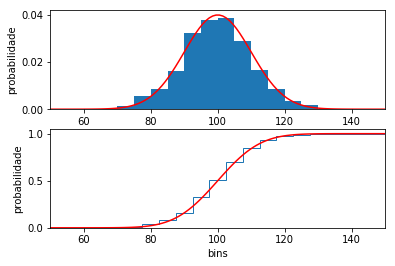

In [16]:
from scipy.stats import norm
mu = 100
sig = 10
data = rnd.normal(loc=mu, scale=sig, size=1000)
print('média dos dados é:', np.mean(data))
print('desvio padrão dos dados é:', np.std(data))
plt.subplot(211)
a = plt.hist(data, bins=20, range=(50, 150), normed=True)
x = np.linspace(50, 150, 100)
y = norm.pdf(x, mu, sig)
plt.plot(x, y, 'r')
plt.xlim(50, 150)
plt.ylabel('probabilidade')
plt.subplot(212)
b = plt.hist(data, bins=20, range=(50, 150), cumulative=True, \
             histtype='step', normed=True, align='right')
y = norm.cdf(x, mu, sig)
plt.plot(x, y, 'r')
plt.xlim(50, 150)
plt.xlabel('bins')
plt.ylabel('probabilidade');

<a href="#back1">Voltar ao Exercício 1</a>

<a name="ex2answer">Soluções do Exercício 2</a>

IQR pdf: 17.3020409992 22.6979590008
IQR dos dados  16.6812350038 22.5296106987


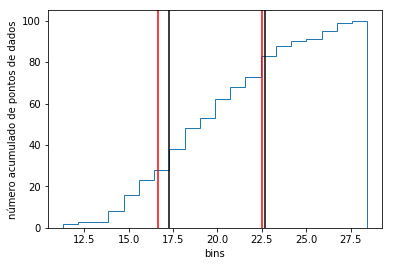

In [17]:
mu = 20
sig = 4
p25, p75 = norm.ppf([0.25, 0.75], loc=mu, scale=sig)
print('IQR pdf:', p25, p75)
data = rnd.normal(loc=mu, scale=sig, size=100)
d25, d75 = np.percentile(data, [25, 75])
print('IQR dos dados ', d25, d75)
plt.hist(data, bins=20, cumulative=True, histtype='step')
plt.axvline(d25, color='r')
plt.axvline(d75, color='r')
plt.axvline(p25, color='k')
plt.axvline(p75, color='k')
plt.xlabel('bins')
plt.ylabel('número acumulado de pontos de dados');

<a href="#back2">Voltar ao Exercício 2</a>

<a name="ex3answer">Soluções do Exercício 3</a>

In [18]:
from pandas import read_csv
w = read_csv('douglas_data.csv',skiprows=[1],skipinitialspace=True)
print('mínimo e máximo da resistência à flexão: ', w.bstrength.min(), w.bstrength.max())
print('média e desvio padrão da densidade: ', w.density.mean(), w.density.std())
print('2.5%, 50%, 97.5% da largura do anel da árvore: ')
print(w.treering.quantile([0.025, 0.5, 0.975]))

mínimo e máximo da resistência à flexão:  15.66 101.53
média e desvio padrão da densidade:  575.7247191011236 62.0073830786214
2.5%, 50%, 97.5% da largura do anel da árvore: 
0.025    2.04750
0.500    3.78000
0.975    7.00875
Name: treering, dtype: float64


<a href="#back3">Voltar ao Exercício 3</a>

<a name="ex4answer">Soluções do Exercício 4</a>

média dos conteúdos de humidade:  13.553932584269662
desvio padrão dos conteúdos de humidade:  1.7931673875992056


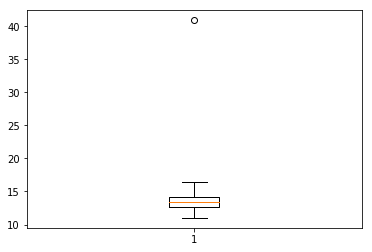

In [19]:
print('média dos conteúdos de humidade: ', w.moisture.mean())
print('desvio padrão dos conteúdos de humidade: ', w.moisture.std())
a = plt.boxplot(w.moisture)

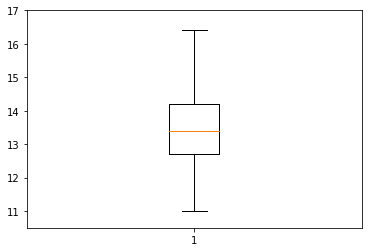

In [20]:
plt.boxplot(w.moisture[w.moisture < 30])
plt.ylim(10.5, 17);

<a href="#back4">Voltar ao Exercício 4</a>

<a name="ex5answer">Soluções do Exercício 5</a>

percentil 5 empírico:  22.412499999999998


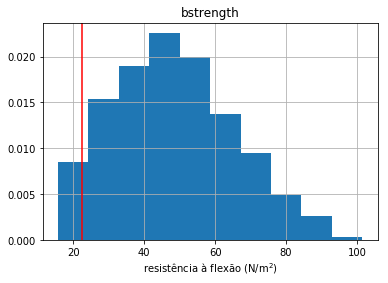

In [21]:
w.hist(column='bstrength', normed=True)
plt.xlabel('resistência à flexão (N/m$^2$)')
five = w.bstrength.quantile(0.05)
print('percentil 5 empírico: ', five)
plt.axvline(five, color='r');

<a href="#back5">Voltar ao Exercício 5</a>

<a name="ex6answer">Soluções do Exercício 6</a>

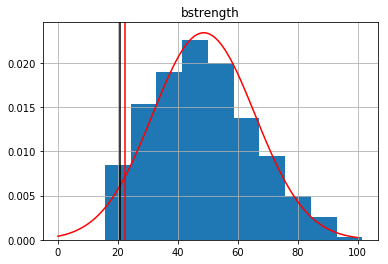

In [22]:
from scipy.stats import norm
w.hist(column='bstrength', normed=True)
meanstrength = w.bstrength.mean()
stdstrength = w.bstrength.std()
x = np.linspace(0, 100, 100)
y = norm.pdf(x, loc=meanstrength, scale=stdstrength)
plt.plot(x, y, 'r')
plt.axvline(five, color='r')
plt.axvline(meanstrength - 1.64 * stdstrength, color='k');

<a href="#back6">Voltar ao Exercício 6</a>

A obra "Notebook 10: Variáveis aleatórias contínuas" é um derivado de [Notebook 10: Continuous random variables](http://nbviewer.jupyter.org/github/mbakker7/exploratory_computing_with_python/blob/master/notebook10_continuous_random_variables/py_exploratory_comp_10_sol.ipynb) de [mbakker7](https://github.com/mbakker7), sob a licença CC BY (4.0 Licença Internacional). "Notebook 10: Variáveis aleatórias contínuas" é publicado sob a licença CC BY (4.0 Licença Internacional) por Educa2030.